<a href="https://colab.research.google.com/github/PrabhaviWKP/Machine-Learning/blob/main/notebooks/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [20]:
!git clone https://github.com/PrabhaviWKP/Machine-Learning.git


Cloning into 'Machine-Learning'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 378.56 KiB | 3.94 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [21]:
%ls /content/drive/MyDrive/Machine-Learning/


data/  models/  notebooks/  README.md  src/


In [22]:
%cd /content/drive/MyDrive/Machine-Learning/notebooks/


/content/drive/MyDrive/Machine-Learning/notebooks


In [25]:
!git config --global user.name "PrabhaviWKP"
!git config --global user.email "prabhaviwalallavita@gmail.com"


In [28]:
import pandas as pd

# Load the dataset from the data folder
data = pd.read_csv('/content/drive/MyDrive/Machine-Learning/data/bank-additional-full.csv', delimiter=';')


In [29]:
# Display the first few rows
print(data.head())

# Check the dataset’s shape and basic information
print(data.shape)
print(data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [30]:
# Get a summary of the dataset’s statistical properties
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [31]:
# Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


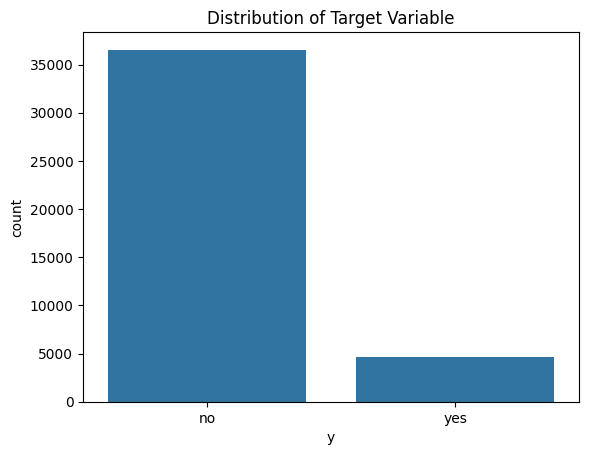

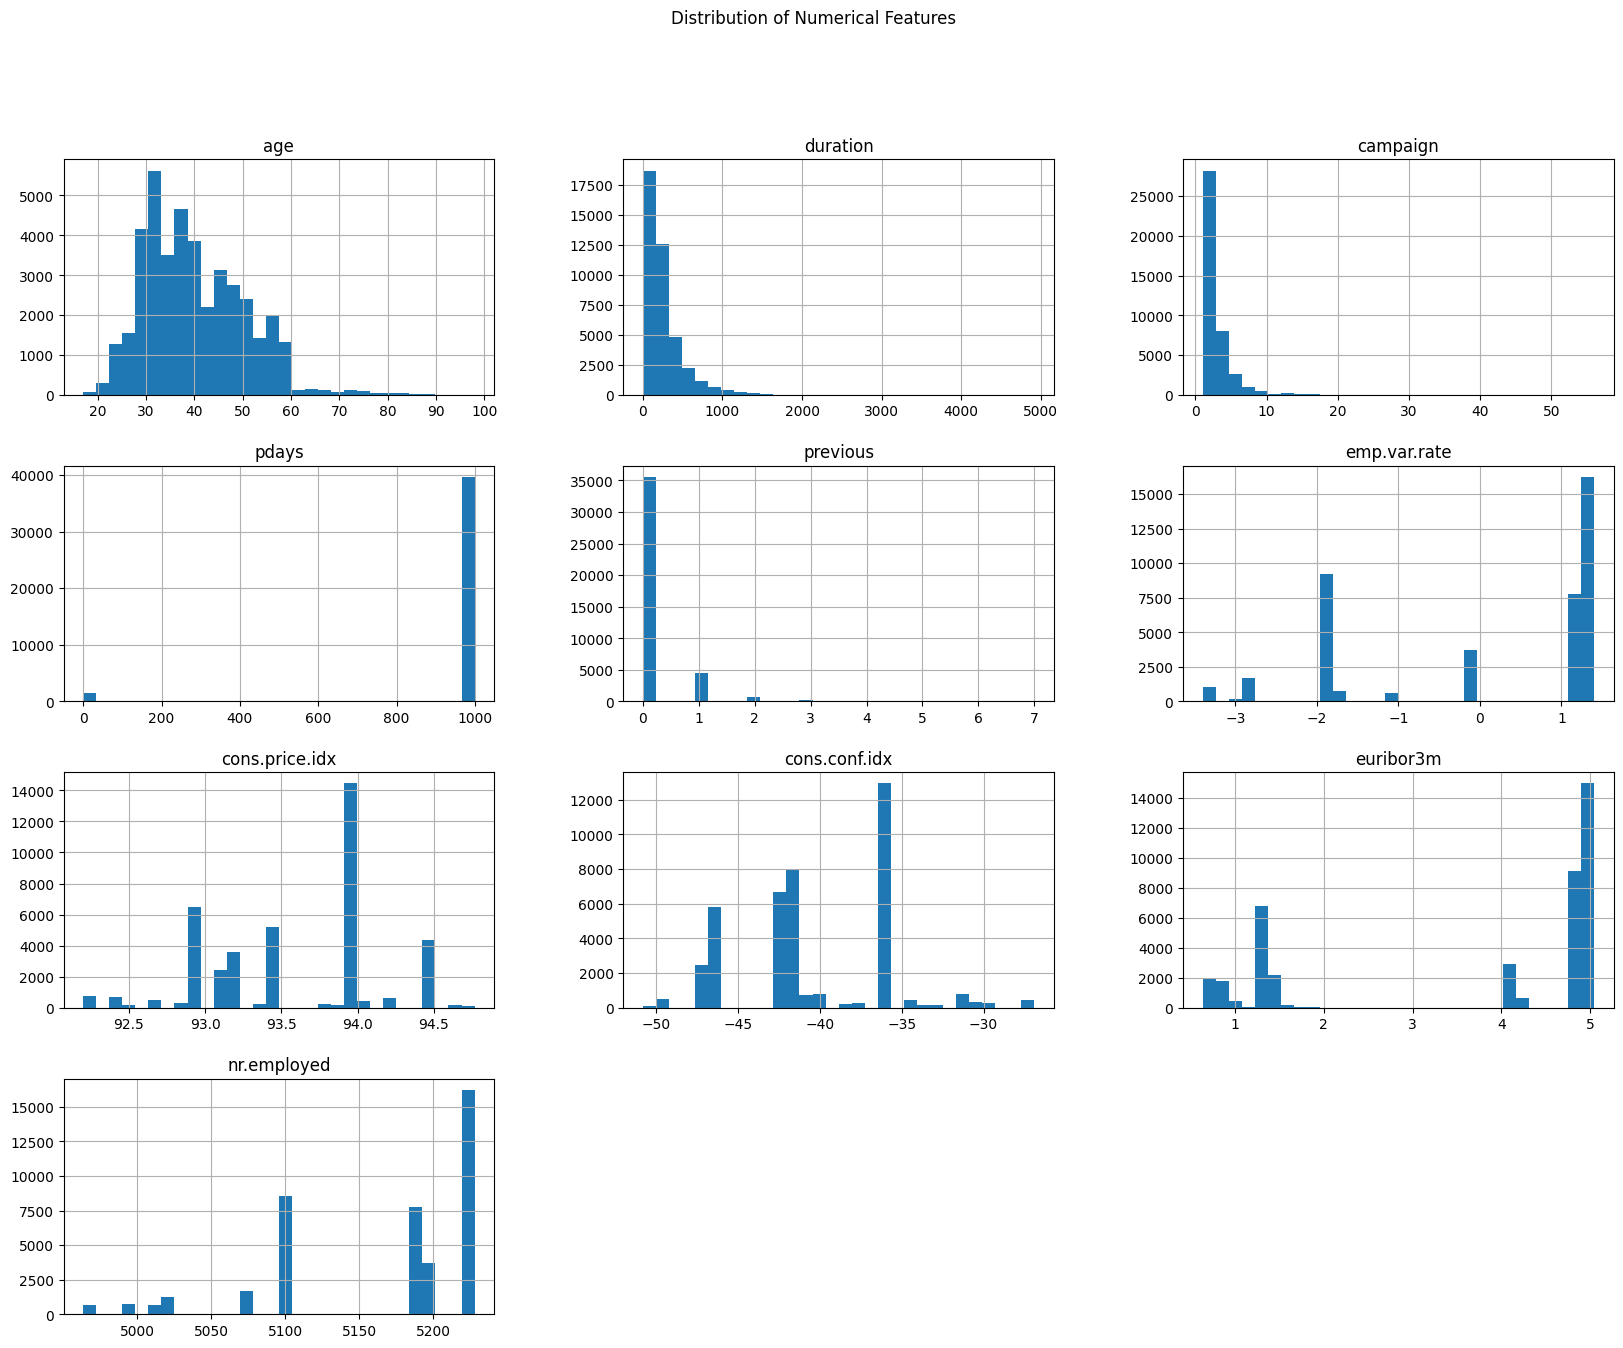

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the distribution of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

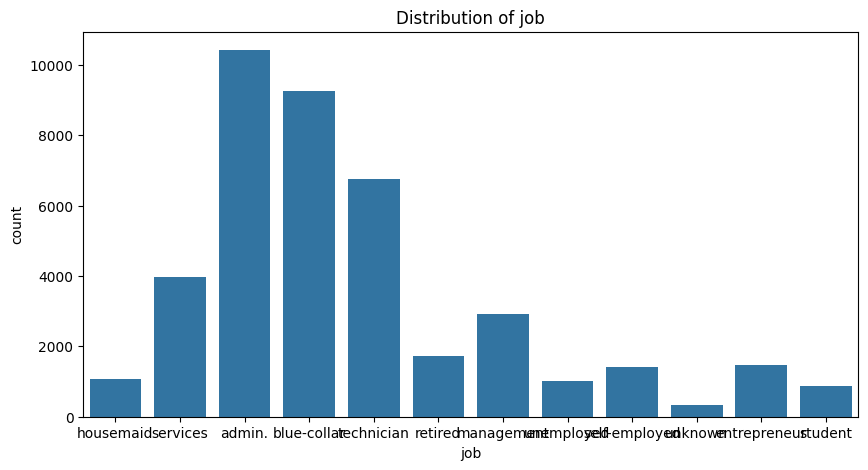

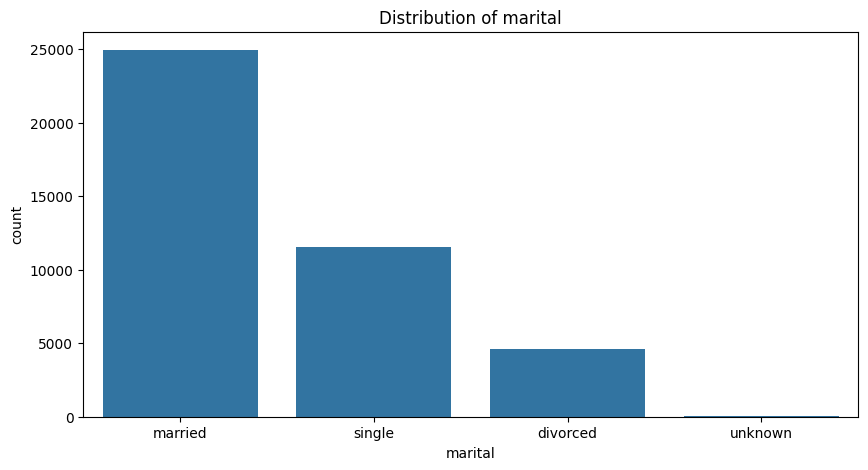

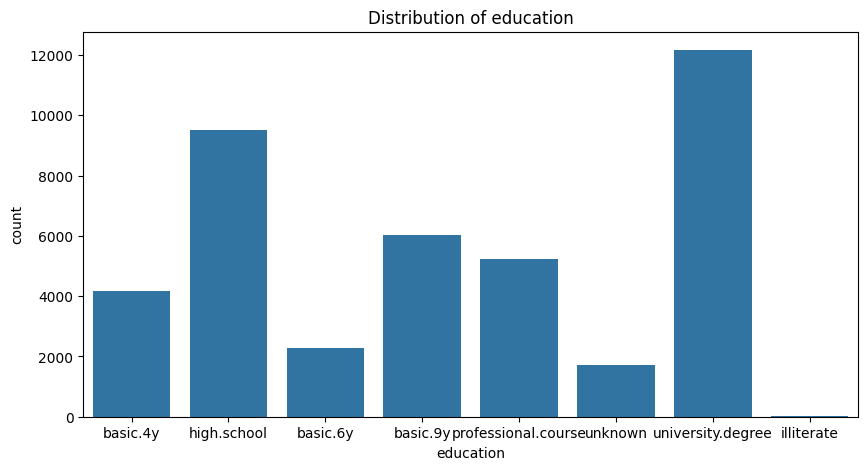

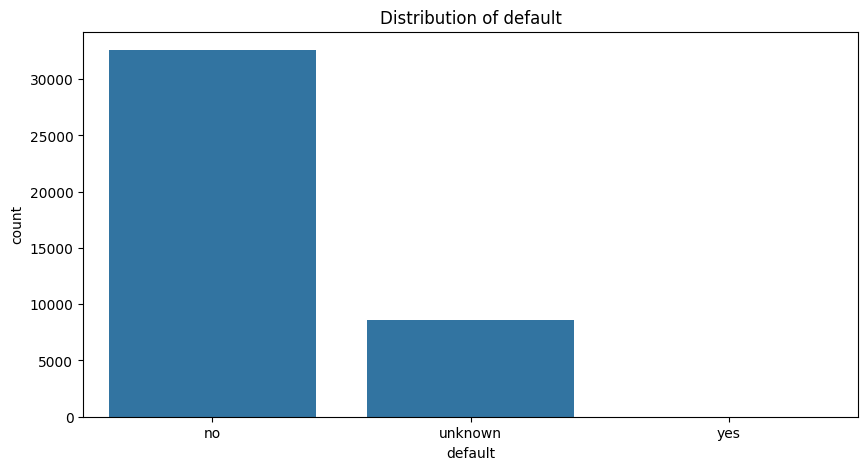

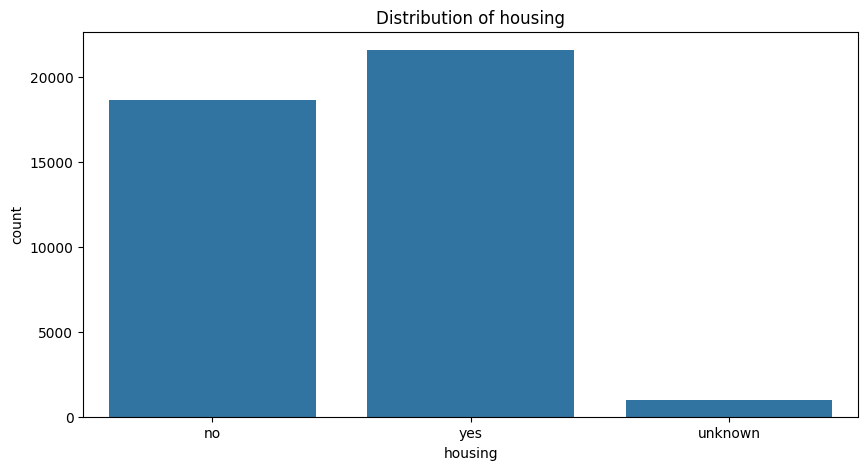

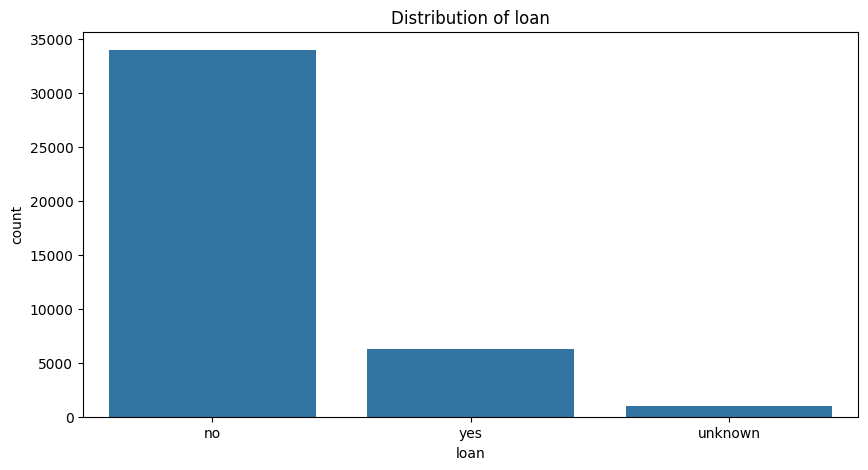

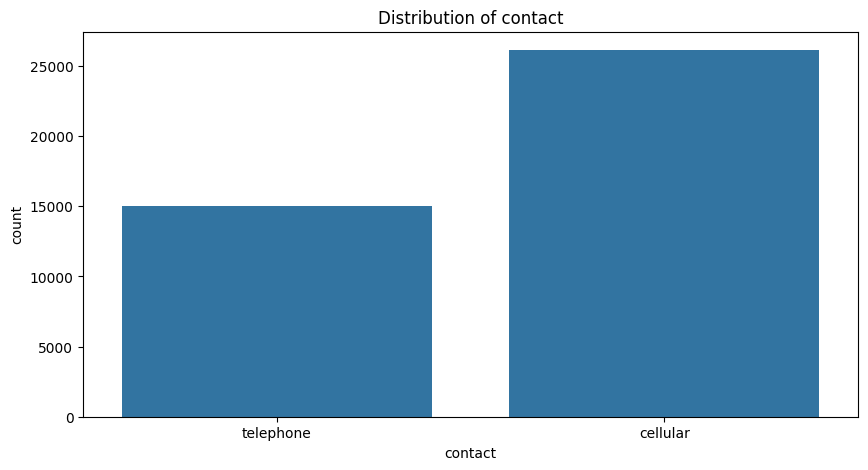

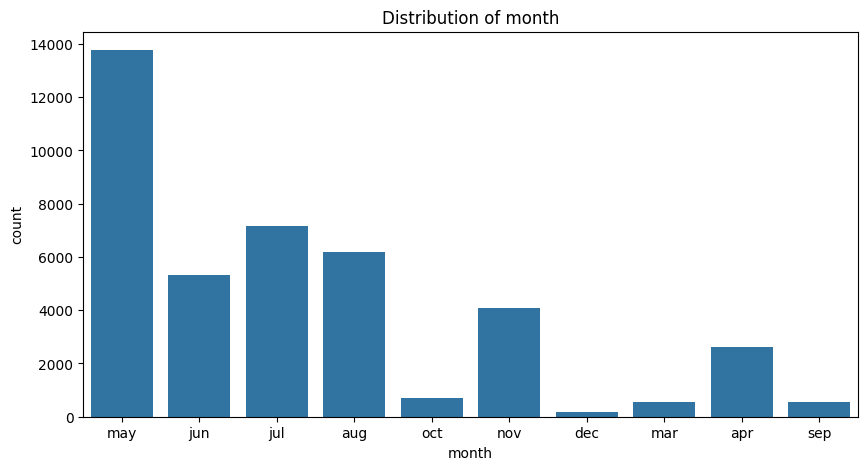

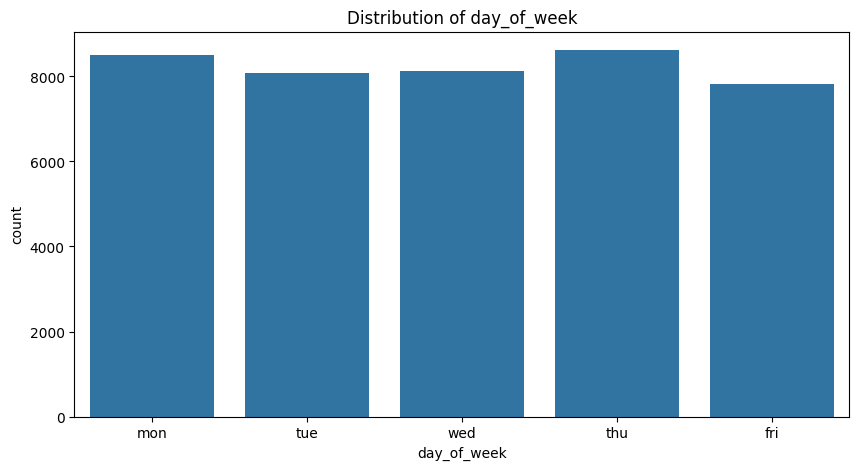

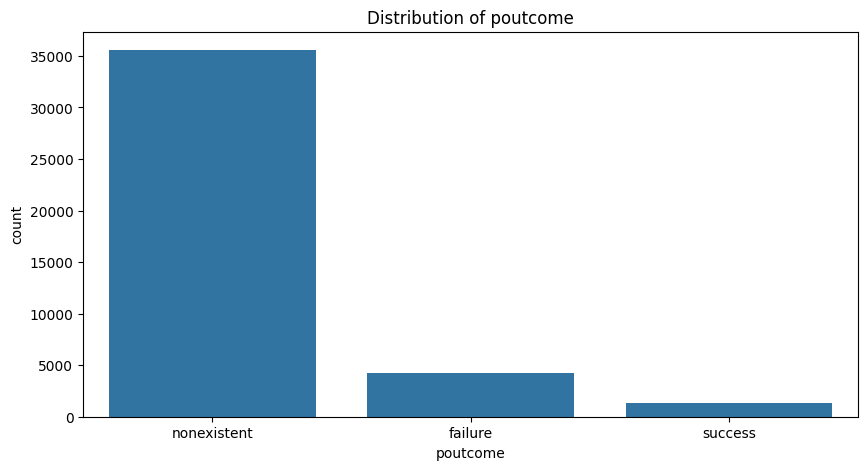

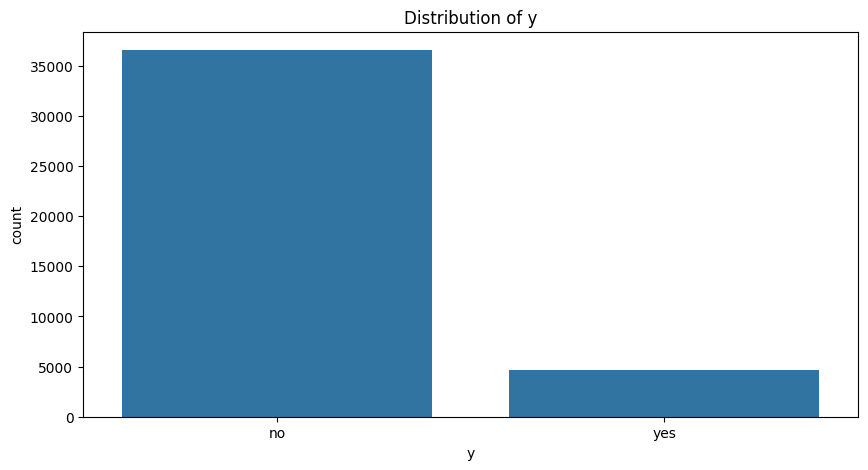

In [33]:
# Visualize the distribution of categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.show()

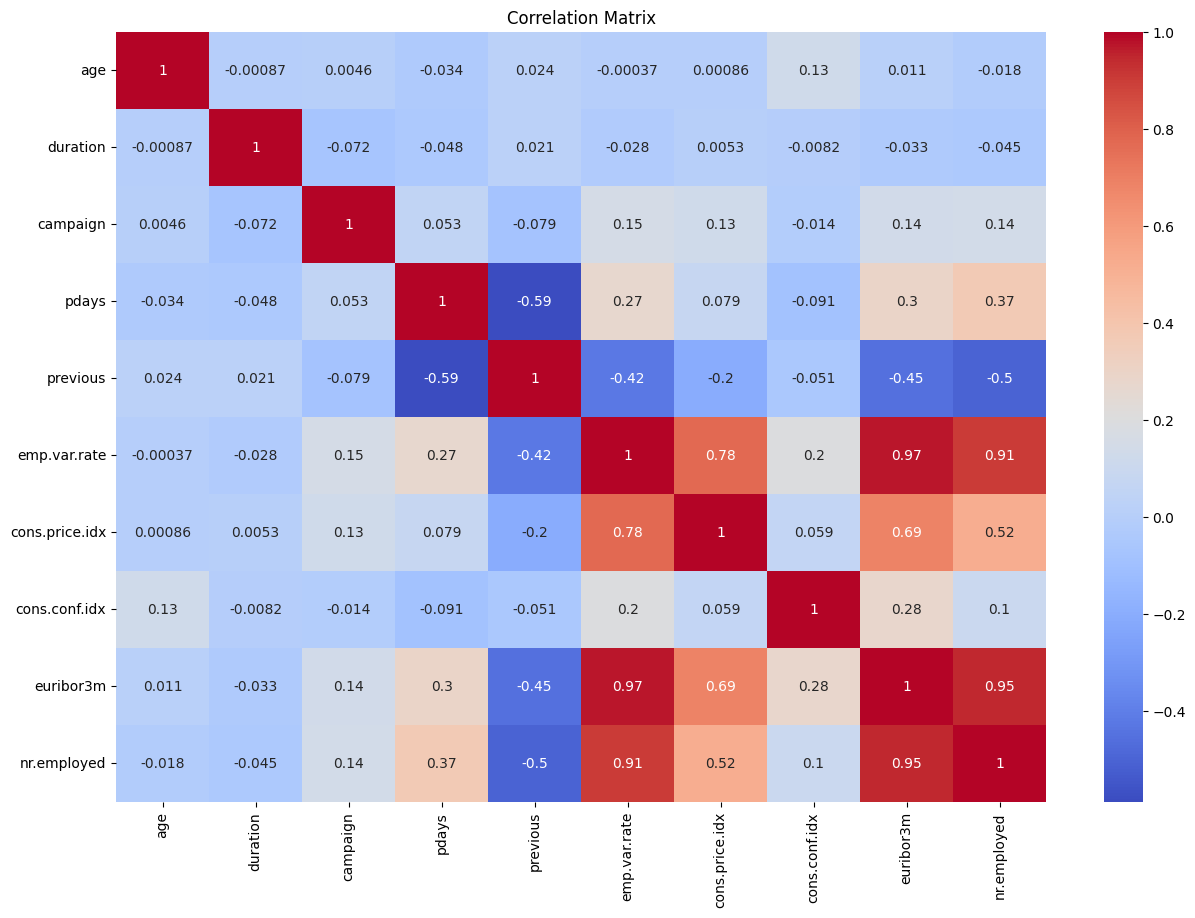

In [35]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

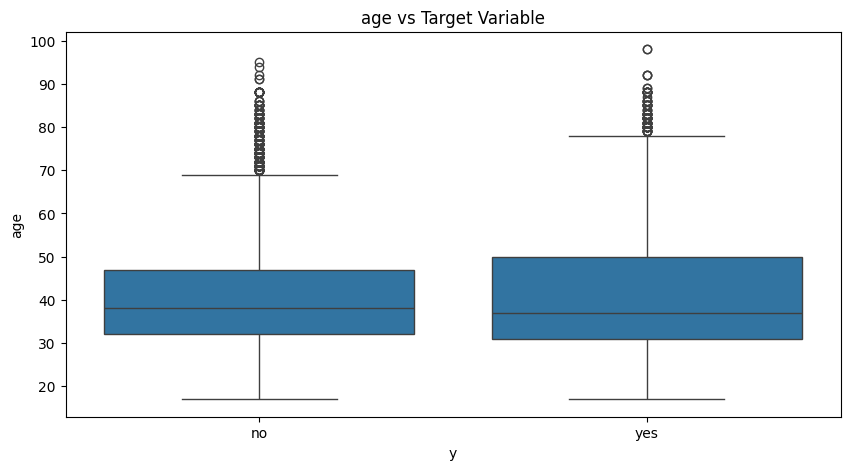

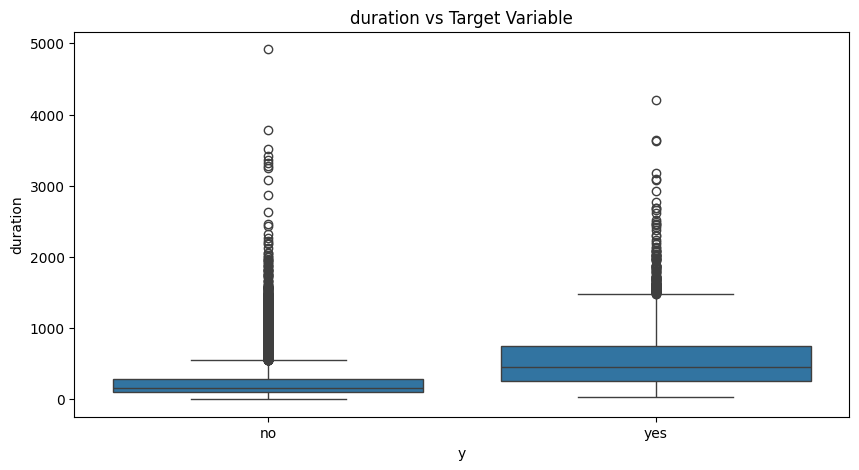

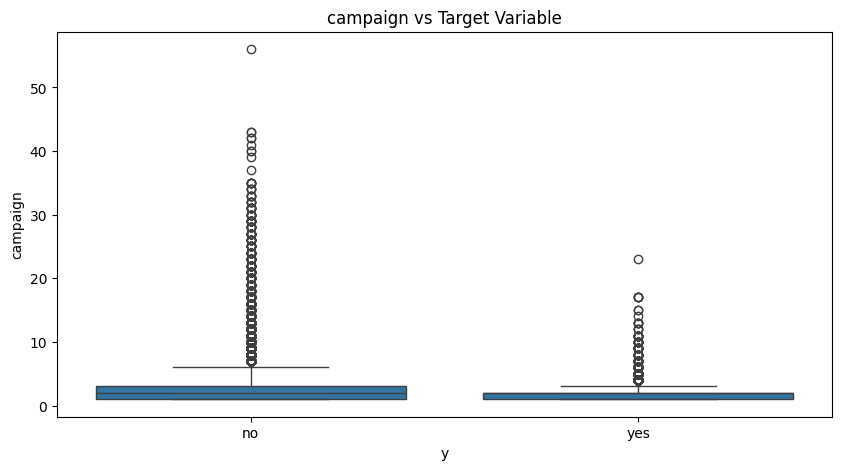

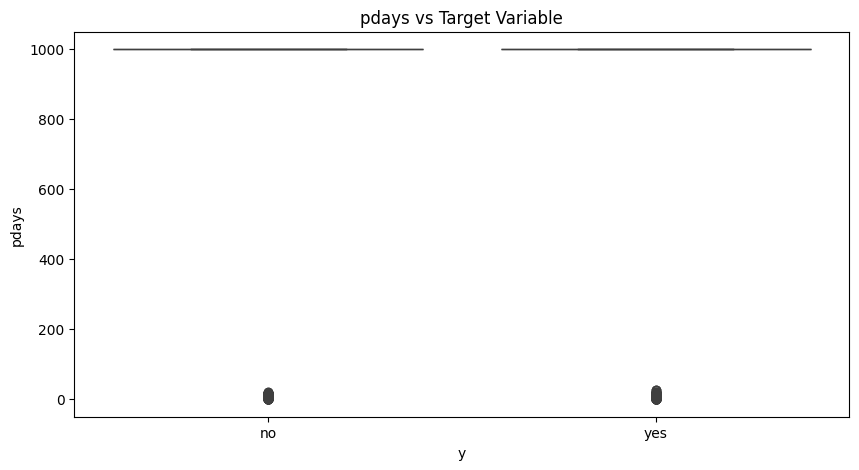

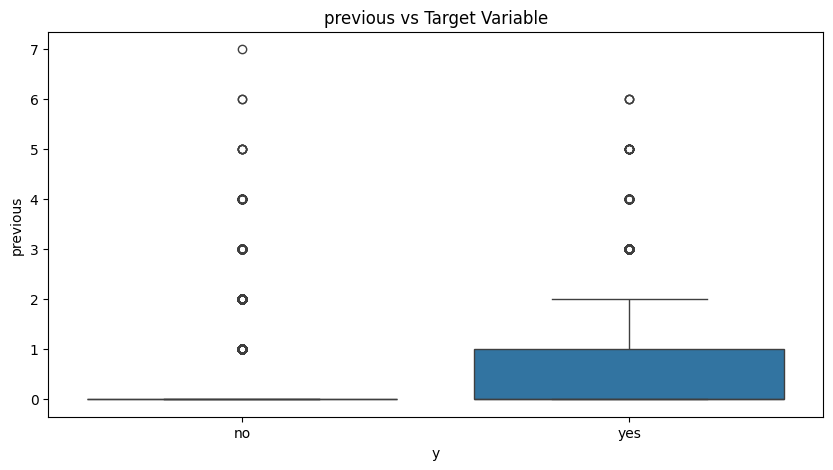

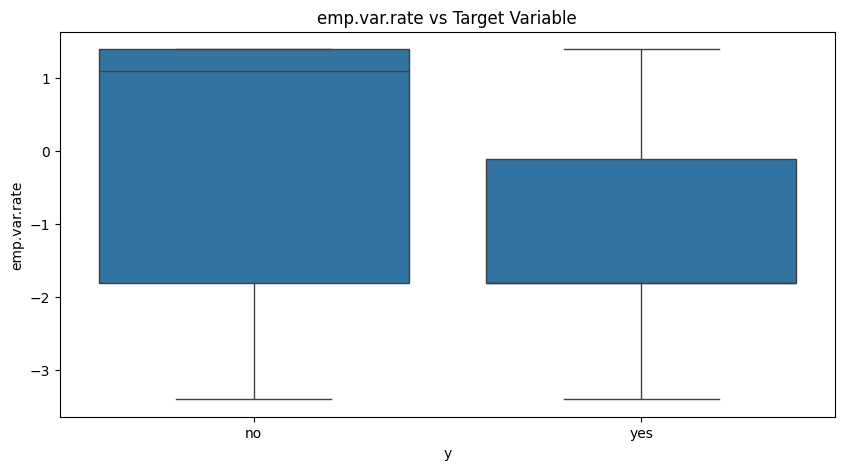

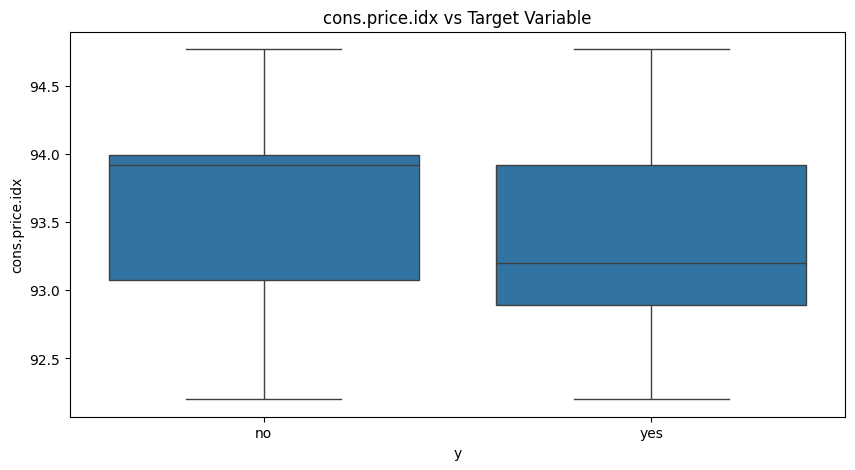

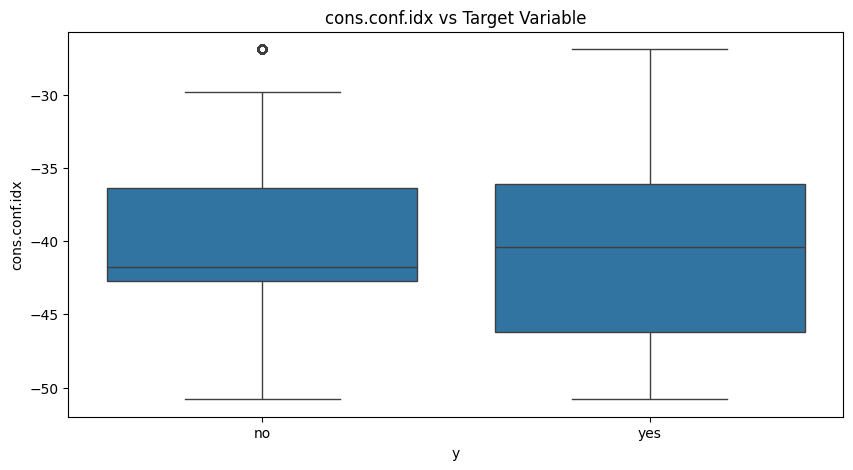

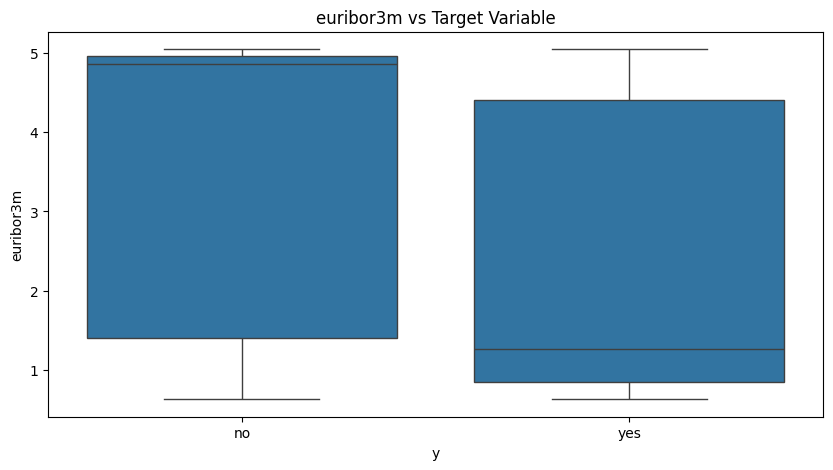

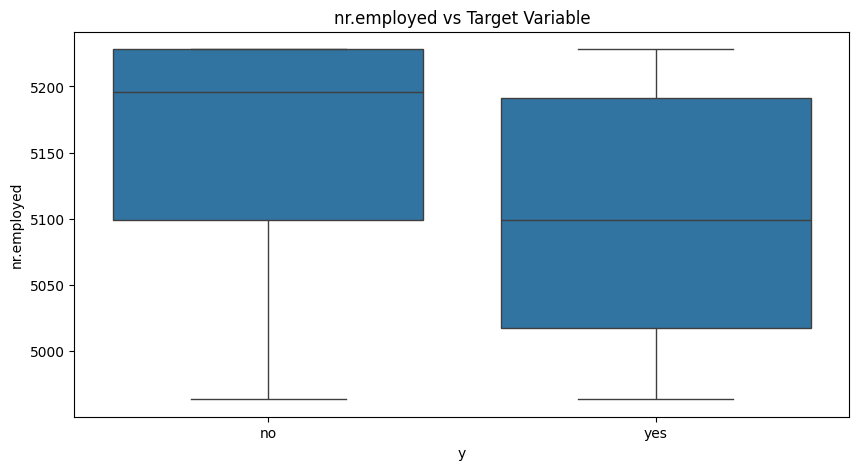

In [36]:
# Visualize the relationship between numerical features and the target variable
for feature in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'{feature} vs Target Variable')
    plt.show()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


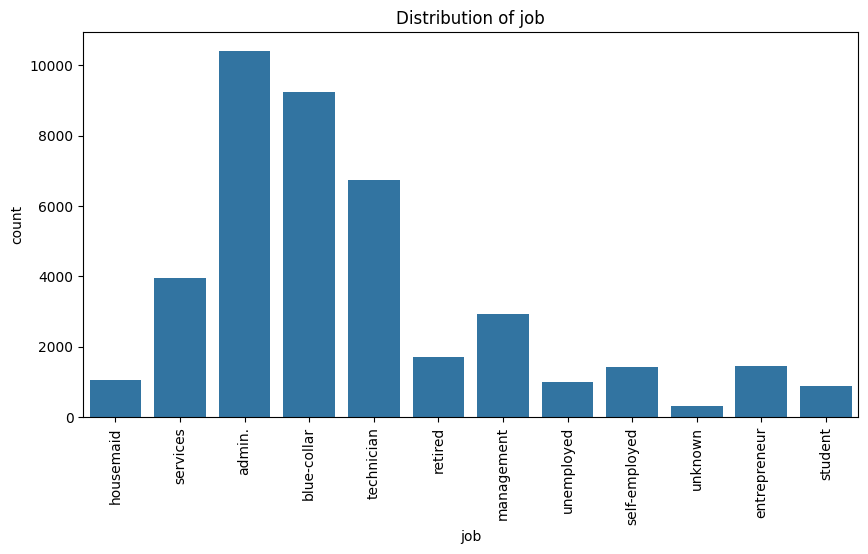

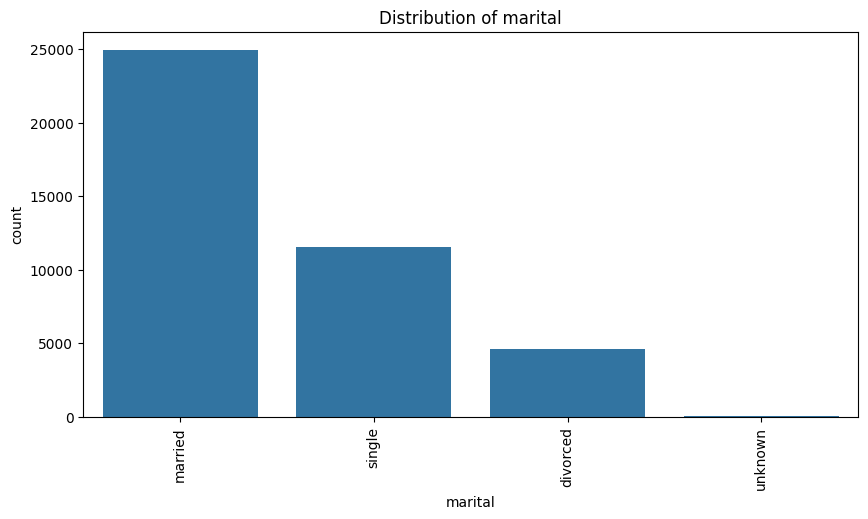

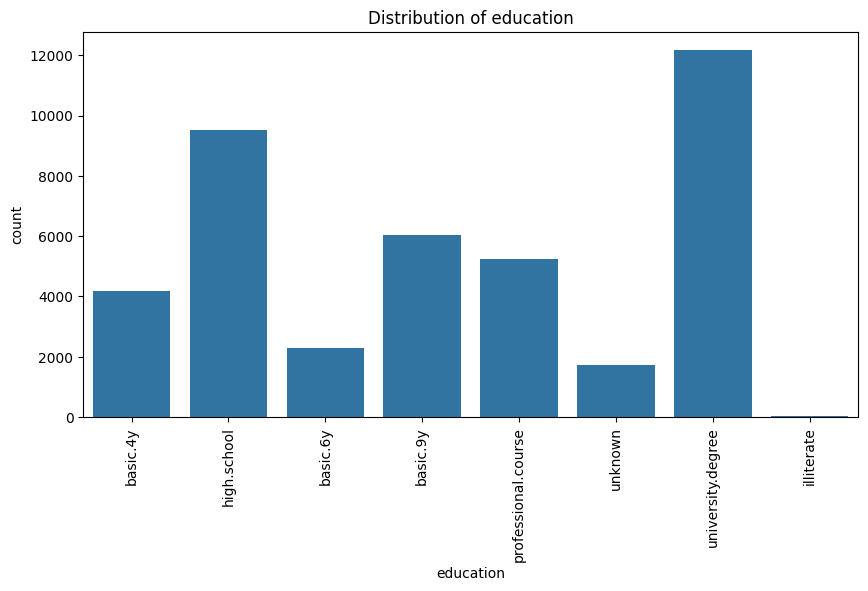

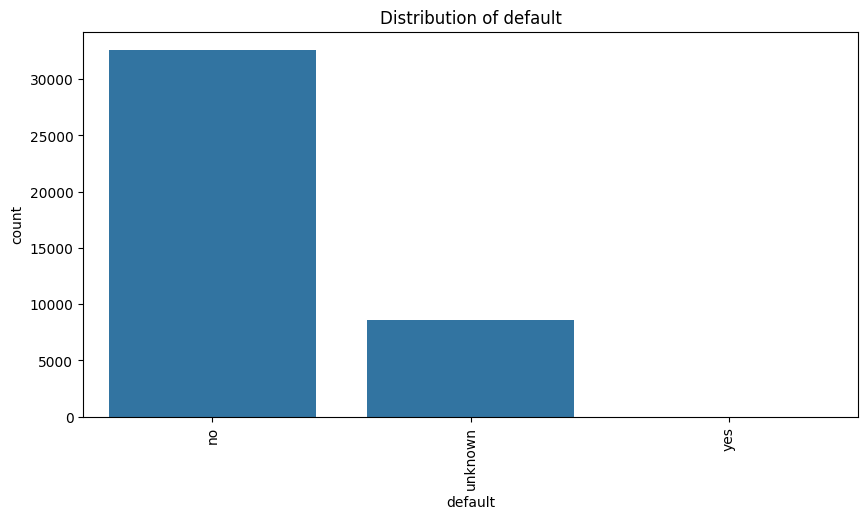

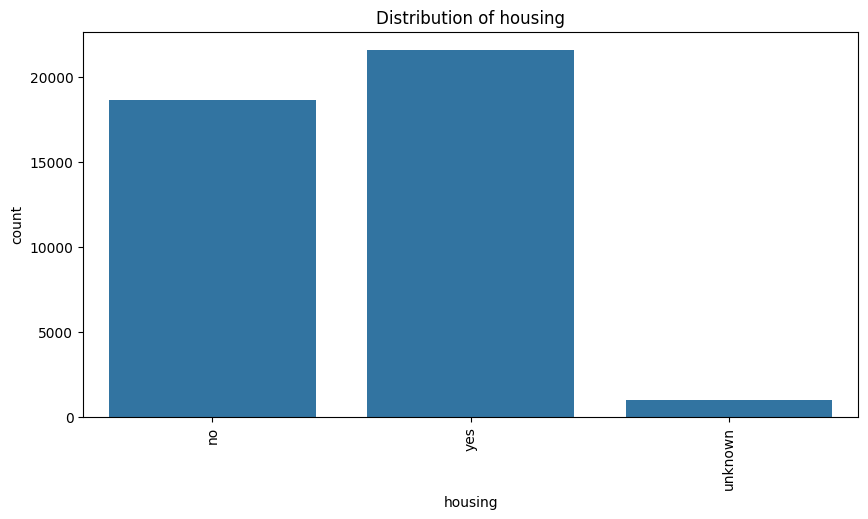

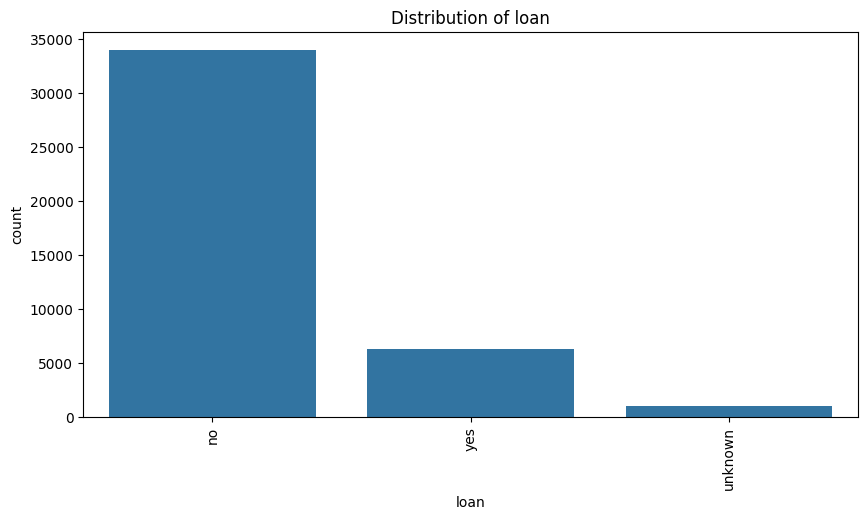

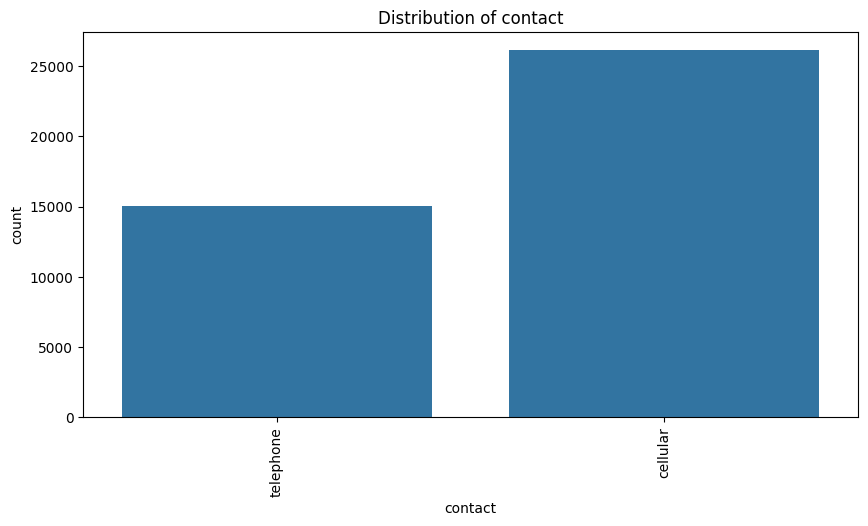

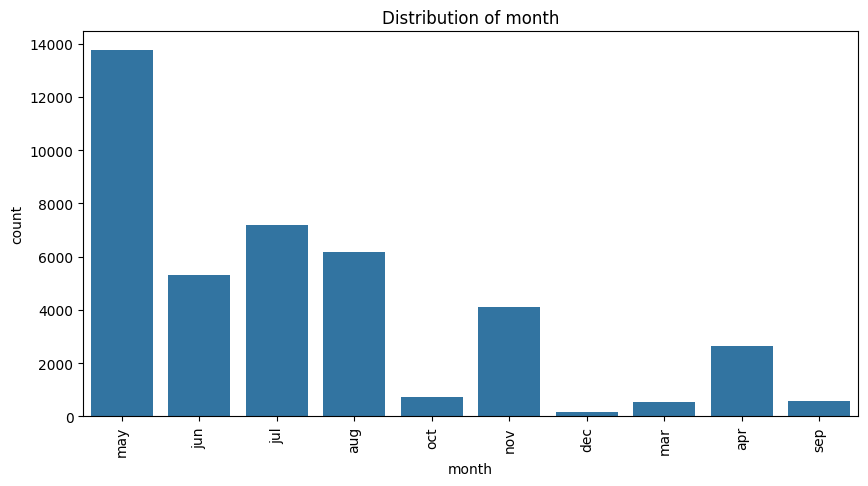

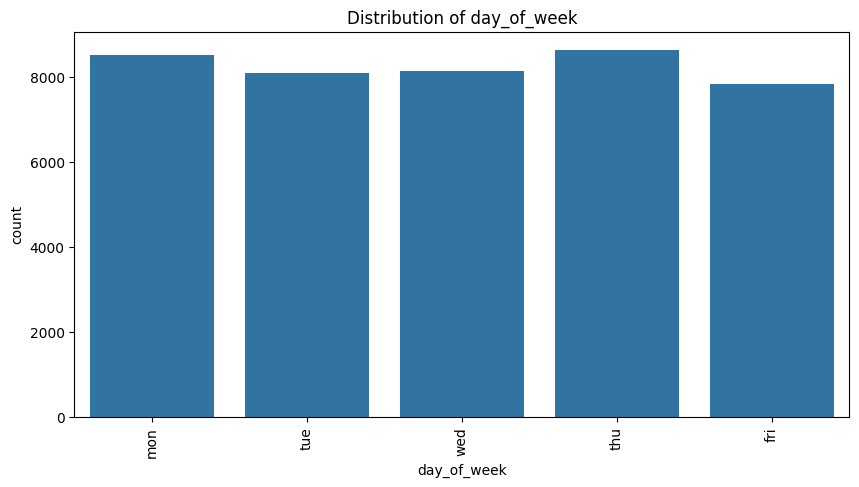

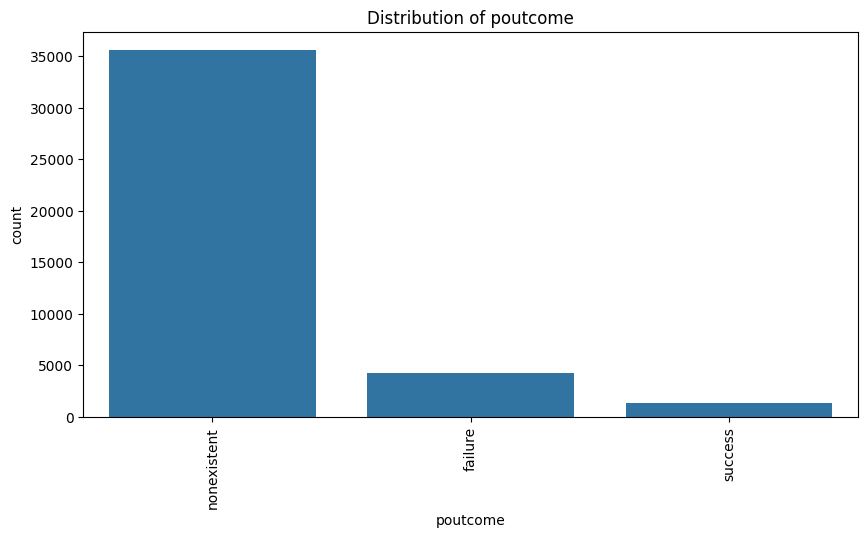

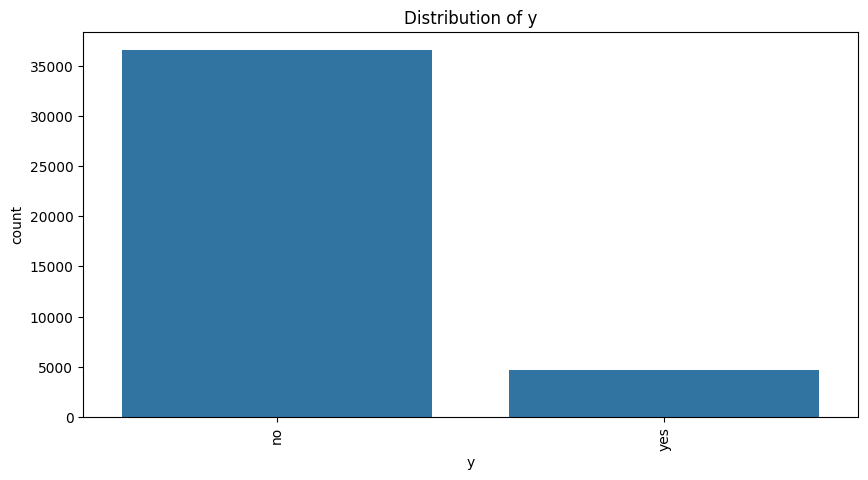

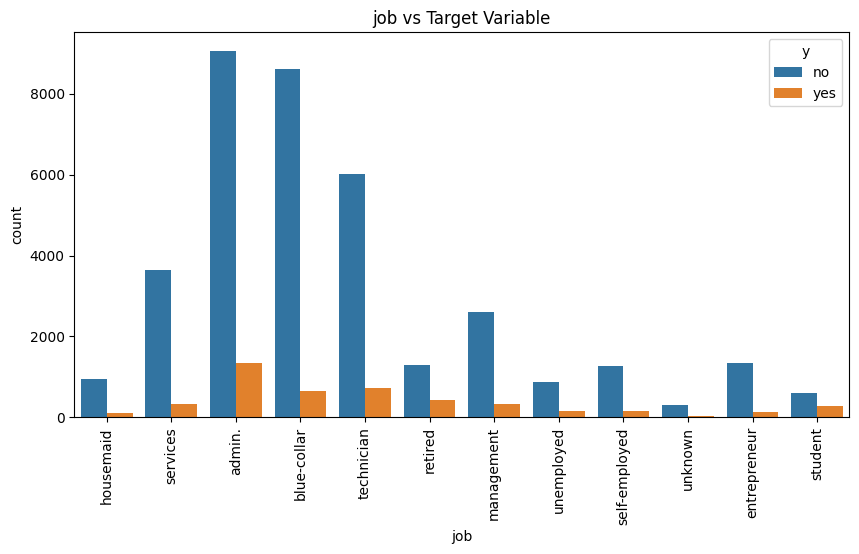

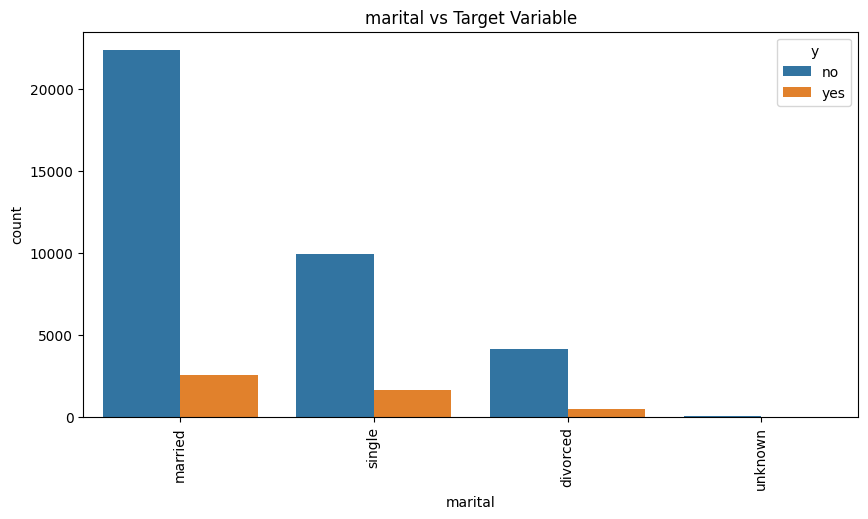

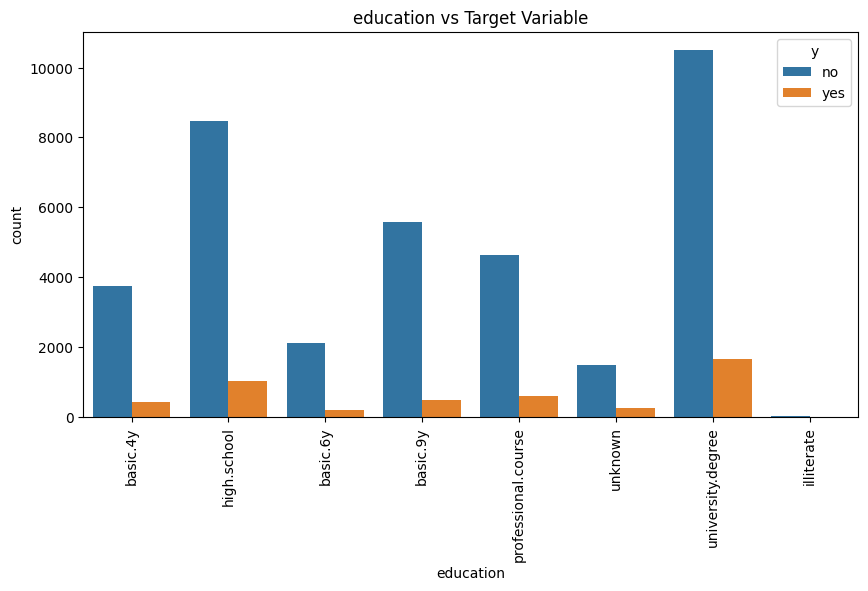

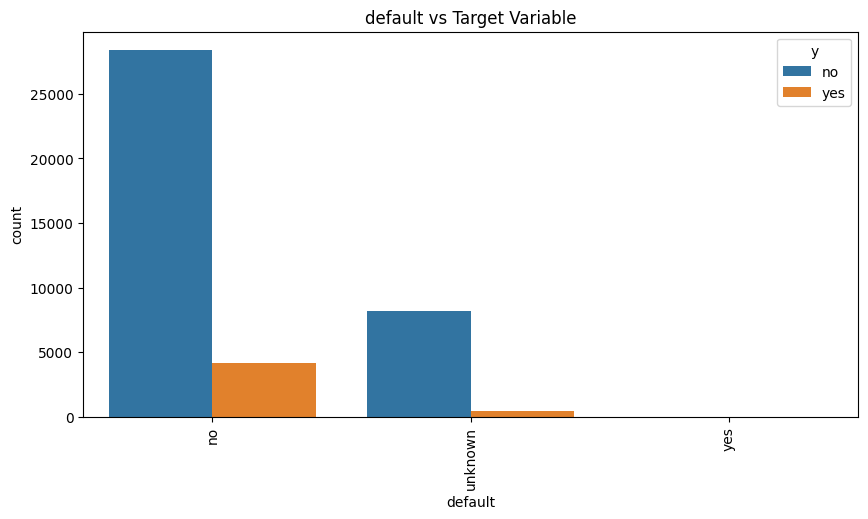

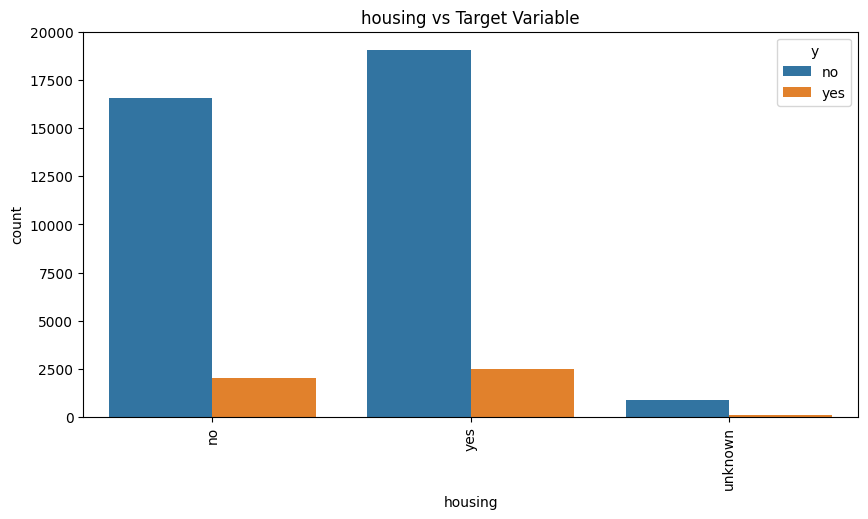

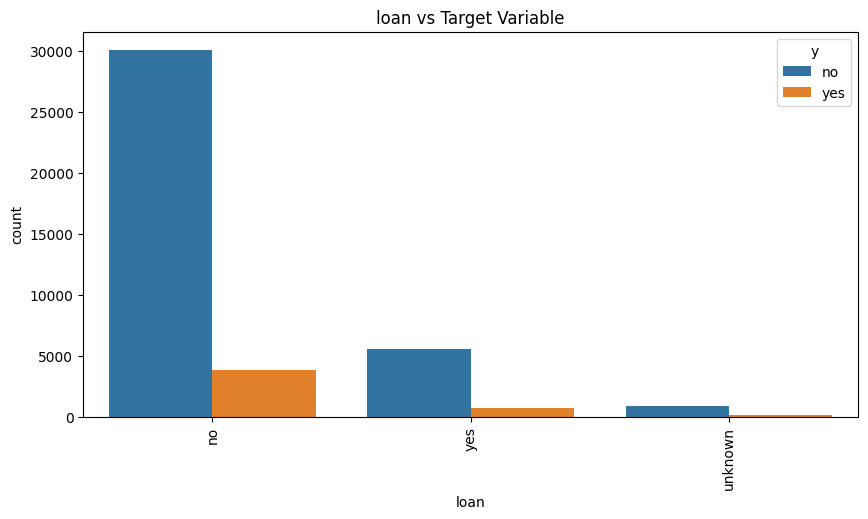

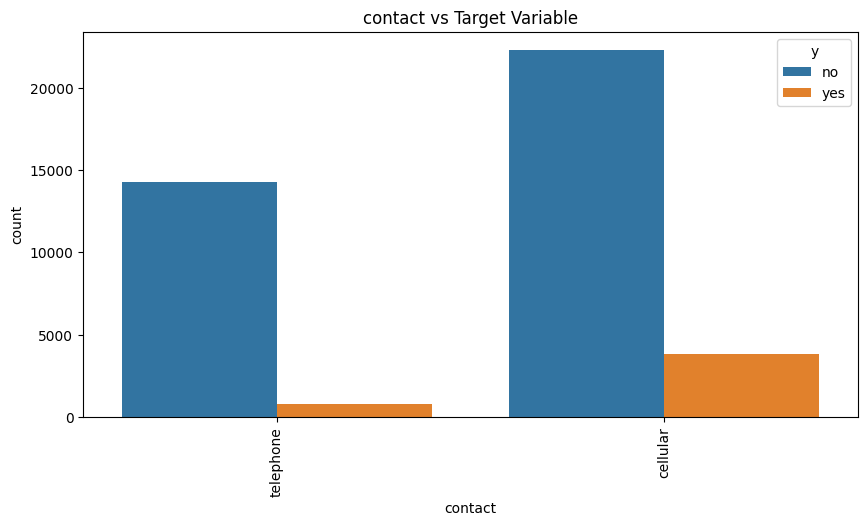

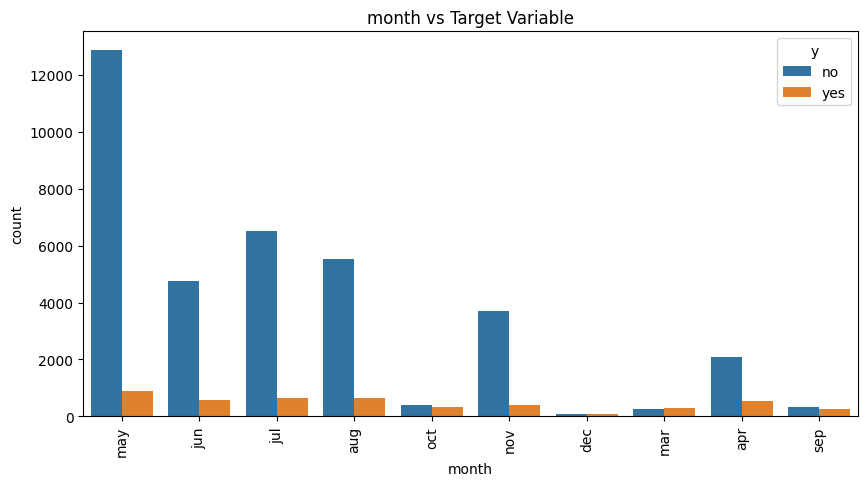

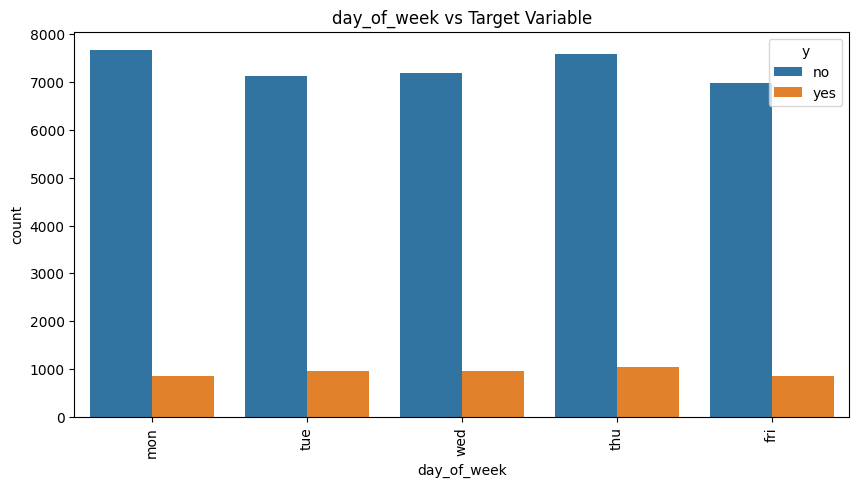

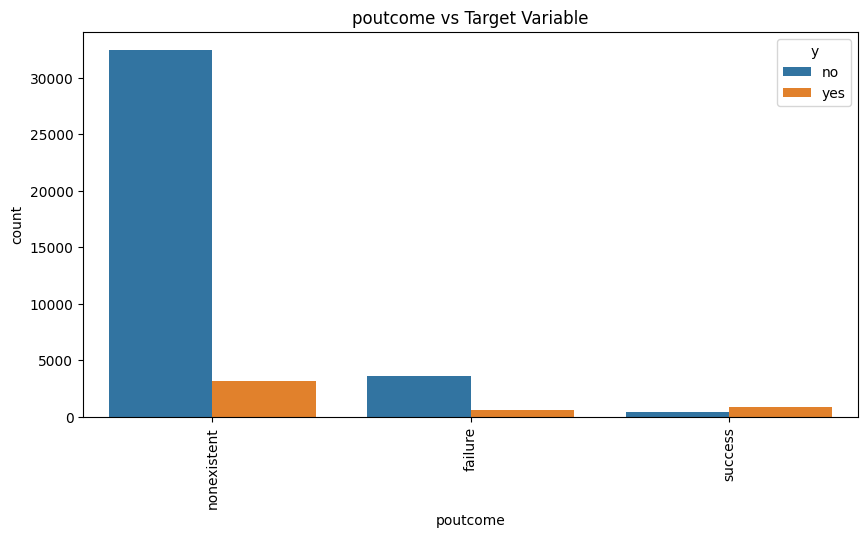

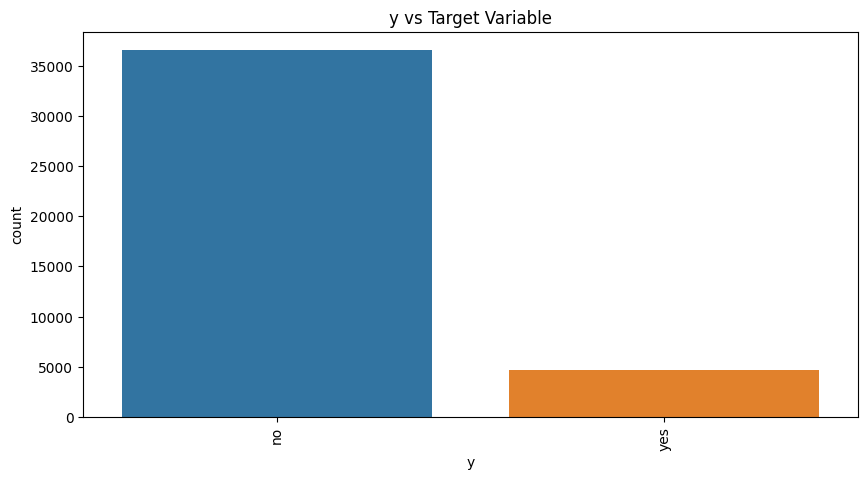

y                 no   yes    All
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
unknown          293    37    330
All            36548  4640  41188
y            no   yes    All
marital                     
divorced   4136   476   4612
married   22396  2532  24928
single     9948  1620  11568
unknown      68    12     80
All       36548  4640  41188
y                       no   yes    All
education                              
basic.4y              3748   428   4176
basic.6y              2104   188   2292
basic.9y              5572   473   6045
high.school           8484  1031   9515
illiterate              14     4     18
profess

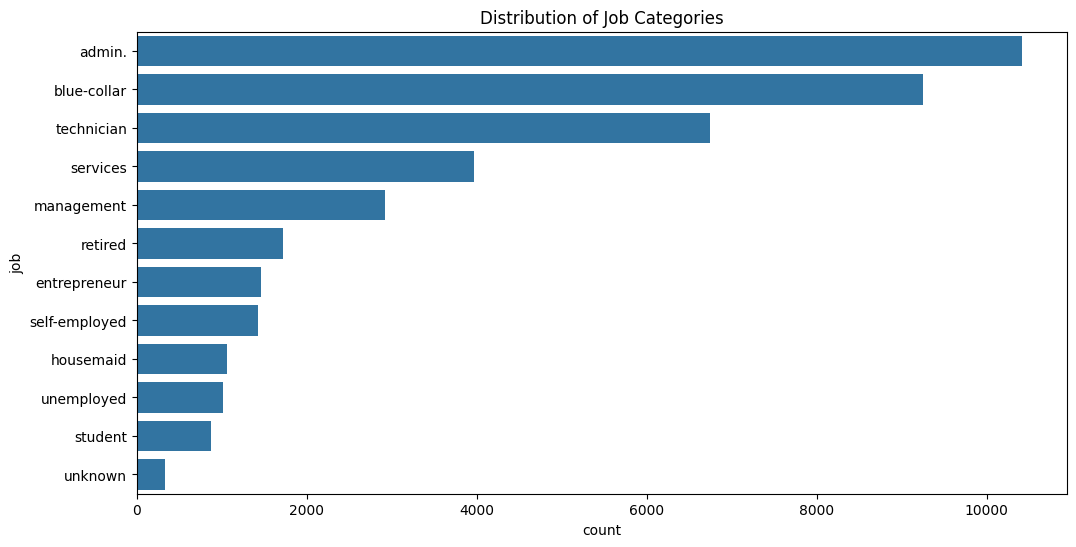

In [37]:
# Identify categorical variables
categorical_features = data.select_dtypes(include=['object']).columns
print(categorical_features)

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

# Visualize the relationship between categorical features and the target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='y', data=data)
    plt.title(f'{feature} vs Target Variable')
    plt.xticks(rotation=90)
    plt.show()

# Cross-tabulation of categorical features with the target variable
for feature in categorical_features:
    print(pd.crosstab(data[feature], data['y'], margins=True))

# Example: Visualizing a categorical variable with many categories
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.show()

# Example: Grouping less frequent job categories into 'Other'
job_counts = data['job'].value_counts()
less_frequent_jobs = job_counts[job_counts < 100].index
data['job'] = data['job'].apply(lambda x: 'Other' if x in less_frequent_jobs else x)